# CS 412 Machine Learning 2020 

# Assignment 1

100 pts

## Goal 

The goal of this assignment 

*  Introduction to the machine learning experimental set up
*  Gain experience with the Scikit library
*  Gain experience with Decision tree and k-NN models

## Dataset

**Wine Quality Dataset** is a collection red and white wines with 12 attributes. The target variable is the 'quality' either 0 or 1


## Task
Build a decision tree and k-NN classifiers with the scikit-learn library function calls to **classify** the quality of wine as good (1) and bad (0)

## Submission

Follow the instructions at the end.

# 1) Initialize

First, make a copy of this notebook in your drive

In [ ]:
# Mount to your drive, in this way you can reach files that are in your drive
# Run this cell

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2) Load Dataset
To start working for your homework, take a copy of the folder, given in the below link to your own google drive. You find the train and test data under this folder.

https://drive.google.com/drive/folders/1PC6M332CTdW-OOrgJ-1GU1F3UaRupka8?usp=sharing

After copy the folder, copy the path of the train and test dataset to paste them in the below cell to load your data.

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/drive/My Drive/CS412/winequality-train.csv')
test_df = pd.read_csv('/content/drive/My Drive/CS412/winequality-test.csv')

# 3) Understand the dataset

You can use the fuctions that we saw in the recitations to understand the dataset

In [ ]:
# print shape of the train and test sets

print("Shape of train set: ", train_df.shape)
print("Shape of test set: ", test_df.shape)


# show random samples from the training data
train_df.head()

Shape of train set:  (5198, 13)
Shape of test set:  (1299, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality
0,6.1,0.32,0.24,1.5,0.036,38.0,124.0,0.98980,3.29,0.42,12.4,0,1
1,8.8,0.20,0.28,1.1,0.018,18.0,72.0,0.99260,2.97,0.35,10.4,0,0
2,6.1,0.21,0.30,6.3,0.039,47.0,136.0,0.99068,3.27,0.31,12.7,0,0
3,8.8,0.17,0.38,1.8,0.040,39.0,148.0,0.99420,3.16,0.67,10.2,0,0
4,11.5,0.42,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.0,1,0


In [ ]:
# print information about the datasets (Is there any missing value? or Categorical feature?)

print("NaN values in training data: ")
print(train_df.isnull().sum())
print("NaN values in test data: ")
print(test_df.isnull().sum())

NaN values in training data: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine type               0
dtype: int64
NaN values in test data: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine type               0
dtype: int64


# 4) Define train and test labels

In [ ]:
# make sure you remove the labels from datasets

train_labels = train_df.pop('quality')
test_labels = test_df.pop('quality')

# 5) FineTune Decision Tree hyper-parameters

1-Splitting dataset into train and validation

In [ ]:
# Split training data to 70% training and 30% validation, do not forget to use the random_state parameter
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_df, train_labels, test_size=0.3, random_state=12)

2- FineTune minimum sample split

In [ ]:
from sklearn.tree import DecisionTreeClassifier

min_samples_splits = range(2, 50)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:

  # Fit the tree using the 70% portion of the training data
  model = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=12)
  model.fit(x_train, y_train)
  
  # Evaluate on Training set
  train_acc = model.score(x_train, y_train)
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_acc = model.score(x_val, y_val)
  val_results.append(val_acc)

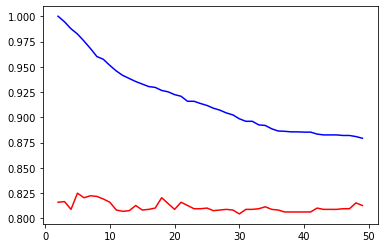

In [ ]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [ ]:
# Choose the best minimum split sample based on the plot
import time
Best_minSampl = min_samples_splits[np.argmax(val_results)]

# Train decision tree using the full training data and the best minimum split sample
dectree = DecisionTreeClassifier(min_samples_split=Best_minSampl, random_state=12)

start_time = time.time()
dectree.fit(x_train, y_train)
print("Time for the training: %.4f secs" % (time.time()-start_time))
# Estimate the prediction of the test data
test_pred = dectree.predict(test_df)

from sklearn.metrics import accuracy_score
# Calculate accuracy of test data
TestAcc = accuracy_score(test_labels, test_pred)
print("Testing Accuracy = %.4f%%" % (TestAcc * 100))

Time for the training: 0.0371 secs
Testing Accuracy = 81.2933%


# 6) Apply the same procedure but using k-NN instead of decision tree

For finetuning, find the best value of K to use with this dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = range(1,30,2)

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []
for k in kVals:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  val_acc = knn.score(x_val, y_val)
  accuracies.append(val_acc)

print("Best Validation Accuracy = %.4f%%" % (np.max(accuracies)*100))

Best Validation Accuracy = 80.3846%


In [ ]:
# Train k-NN using the full training data with the best K that you found
best_knn = KNeighborsClassifier(n_neighbors=kVals[np.argmax(accuracies)])
start_time = time.time()
best_knn.fit(x_train, y_train)
print("Time for the training: %.4f secs" % (time.time()-start_time))

# Testing
preds = best_knn.predict(test_df)
accuracy = accuracy_score(test_labels, preds)
print("Testing Accuracy = %.4f%%" % (accuracy * 100))

Time for the training: 0.0126 secs
Testing Accuracy = 80.6774%


# Write your report in this cell

Problem definition: The problem is to label the wines as good or bad according to their oother qualities. We have a dataset that we use for training, the models need to learn from that data and should be able to tell if a wine from an un-seen data needs to be labeled aas good or bad with high accuracy.

We have checked if there are any null values in the dataset, if there were we should have changed them with an appropiate value or maybe discard that column or row according to the importance. However, we did not encouter such null value so we proceeded. Afterwards, we have splitted the data as labels(outputs, y values) and the inputs(x values). 

We trained the data with train dataset which was %70 of the training data since we need a large dataset to make the model learn and we gave %30 to the validation dataset. We have used validation datasets to see which hyperparameters work better (min sample split in decision tree and n value in knn). The test dataset is used to see if our model can predict with good accuracy in a dataset that it has never seen before. 

In decision tree classifier, the best results came with the min sample split being 5, giving classification accuracy of 81.2933% on test data.  In knn classifier, the best results came with n being 29 giving classification accuracy of 80.6774%. Decision tree is the better model since the accuracy of it is higher than knn's. 

We can observe that a high n value give a better knn model in this example, the highest was 29 in our range and the best validation score was its. Both algorithms were fast, I could not observe an important difference. However, when I used time library and checked the training times, knn turned out to be a little faster than decision tree. 